In [34]:
import numpy as np
import sys
if "../" not in sys.path:
    sys.path.append("../")
from collections import defaultdict
from lib import plotting
import matplotlib
from lib.envs.windy_gridworld import WindyGridworldEnv
import itertools
matplotlib.style.use('ggplot')

In [35]:
env = WindyGridworldEnv()

In [36]:
def make_epsilon_greedy_policy(Q, epsilon):
    def policy(state):
        A = epsilon * np.ones(env.action_space.n, dtype=float)/env.action_space.n
        best_action = np.argmax(Q[state])
        A[best_action] += 1 - epsilon
        return A
    return policy

In [37]:
def expected_sarsa(env, num_episodes, discount=1.0, alpha=0.5, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n, dtype=float))
    policy = make_epsilon_greedy_policy(Q, epsilon)
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))
    
    for ep in range(num_episodes):
        state = env.reset()
        for t in itertools.count():
            action = np.random.choice(np.arange(len(Q[state])), p=policy(state))
            next_state, reward, done, _ = env.step(action)
            stats.episode_rewards[ep] += reward
            stats.episode_lengths[ep] = t
            target_estimate = 0
            for a, a_prob in enumerate(policy(next_state)):
                target_estimate += a_prob * Q[next_state][a]
            target_estimate = reward + discount*target_estimate
            Q[state][action] += alpha*(target_estimate - Q[state][action])
            if done:
                break
            state = next_state
    return Q, stats

In [38]:
Q, stats = expected_sarsa(env, num_episodes=200)


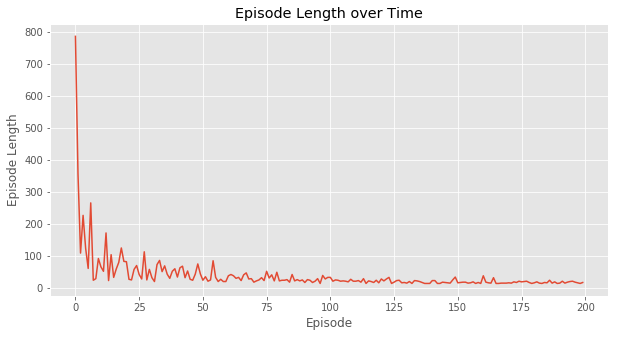

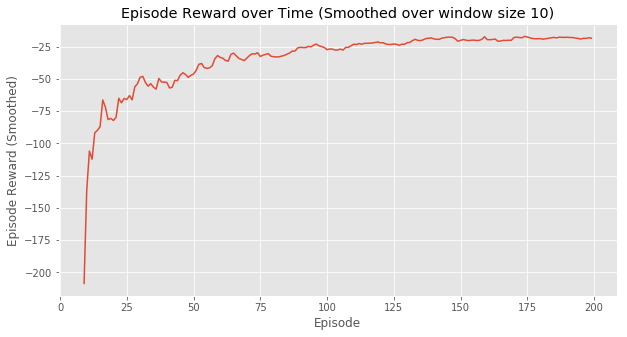

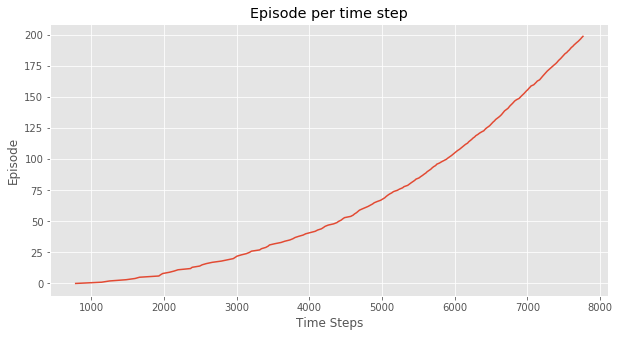

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [39]:
plotting.plot_episode_stats(stats)